# Python for Data Analysis

In [1]:
import requests
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn import preprocessing

## Téléchargement des données

#### Base de données TRAIN

In [2]:
page = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data")
#page.text

In [3]:
file = open('adult_data.csv', 'w')
text = page.text
text = text.replace(".", "")
text = text.replace(" ", "")
file.write(text)
file.close()

In [4]:
df = pd.read_csv("./adult_data.csv",delimiter=',', names=["age", "type_employer", "fnlwgt", "education", 
                "education_num","marital", "occupation", "relationship", "race","sex",
                "capital_gain", "capital_loss", "hr_per_week","country", "income"])

df.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Base de données TEST

In [5]:
page = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test")
#page.text

In [6]:
file = open('adult_test.csv', 'w')
text = page.text
text = text.replace(".", "")
text = text.replace(" ", "")
file.write(text)
file.close()

In [7]:
df_test = pd.read_csv("./adult_test.csv",delimiter=',', names=["age", "type_employer", "fnlwgt", "education", 
                "education_num","marital", "occupation", "relationship", "race","sex",
                "capital_gain", "capital_loss", "hr_per_week","country", "income"])

df_test = df_test.iloc[1:]
df_test.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K


## Data-visualisation des données

### Répartition des âges 

C:\Users\yh\Anaconda3\lib\site-packages\matplotlib\pyplot.py:3363: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)


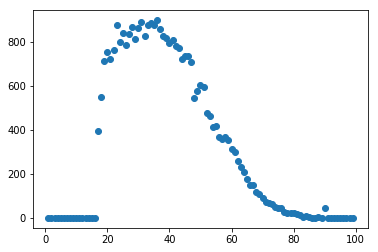

In [9]:
y = []
for i in range(1,100):
    y.append(len(df[ (df['age'] == i ) ]))

df_tmp = pd.DataFrame({'x': range(1,100), 'y': y })

plt.plot( 'x', 'y', data=df_tmp, linestyle='none', marker='o')
plt.show()

### Répartion des revenus en fonction des groupes d'âge

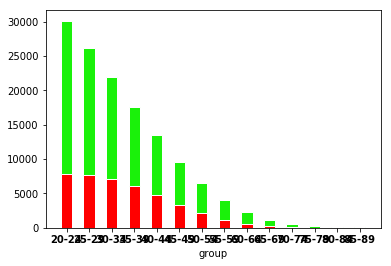

In [11]:
# Values of each group
bars1 = []
bars2 = []

for i in range(0,14):
    bars1.append( len(df[ (df['age'] > i*5+20) & (df['income'] == ">50K") ]) )
    bars2.append( len(df[ (df['age'] > i*5+20) & (df['income'] == "<=50K") ]) )
    
# Heights of bars1 + bars2 (TO DO better)
bars = [40, 35, 17, 12, 32]

# The position of the bars on the x-axis
r = [0,2,4,6,8,10,12,14,16,18,20,22,24,26]

# Names of group and bar width
names = ['20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85-89']
barWidth = 1

# Create brown bars
plt.bar(r, bars1, color='#FF0000', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='#1af10a', edgecolor='white', width=barWidth)

# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("group")

# Show graphic
plt.show()

## Data-préparation

In [12]:
dfprep = df
dfprep = dfprep[ ( dfprep['age'].notnull() ) & (dfprep['age'] > 0) ]
dfprep = dfprep[ dfprep['type_employer'].notnull() ]
dfprep = dfprep[ (dfprep['fnlwgt'].notnull()) & (dfprep['fnlwgt'] > 0) ]
dfprep = dfprep[ dfprep['education'].notnull() ]
dfprep = dfprep[ (dfprep['education_num'].notnull()) & (dfprep['fnlwgt'] > 0)]
dfprep = dfprep[ dfprep['marital'].notnull() ]
dfprep = dfprep[ dfprep['occupation'].notnull() ]
dfprep = dfprep[ dfprep['relationship'].notnull() ]
dfprep = dfprep[ dfprep['race'].notnull() ]
dfprep = dfprep[ dfprep['sex'].notnull() ]
dfprep = dfprep[ (dfprep['capital_gain'].notnull()) & (dfprep['capital_gain'] >= 0)]
dfprep = dfprep[ (dfprep['capital_loss'].notnull())  & (dfprep['capital_loss'] >= 0)]
dfprep = dfprep[ dfprep['hr_per_week'].notnull() ]
dfprep = dfprep[ dfprep['country'].notnull() ]
dfprep = dfprep[ dfprep['income'].notnull() ]
dfprep.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [13]:
dfpreptest = df_test
dfpreptest = dfpreptest[ ( dfpreptest['age'].notnull() ) ]
dfpreptest = dfpreptest[ dfpreptest['type_employer'].notnull() ]
dfpreptest = dfpreptest[ (dfpreptest['fnlwgt'].notnull()) & (dfpreptest['fnlwgt'] > 0) ]
dfpreptest = dfpreptest[ dfpreptest['education'].notnull() ]
dfpreptest = dfpreptest[ (dfpreptest['education_num'].notnull()) & (dfpreptest['fnlwgt'] > 0)]
dfpreptest = dfpreptest[ dfpreptest['marital'].notnull() ]
dfpreptest = dfpreptest[ dfpreptest['occupation'].notnull() ]
dfpreptest = dfpreptest[ dfpreptest['relationship'].notnull() ]
dfpreptest = dfpreptest[ dfpreptest['race'].notnull() ]
dfpreptest = dfpreptest[ dfpreptest['sex'].notnull() ]
dfpreptest = dfpreptest[ (dfpreptest['capital_gain'].notnull()) & (dfpreptest['capital_gain'] >= 0)]
dfpreptest = dfpreptest[ (dfpreptest['capital_loss'].notnull())  & (dfpreptest['capital_loss'] >= 0)]
dfpreptest = dfpreptest[ dfpreptest['hr_per_week'].notnull() ]
dfpreptest = dfpreptest[ dfpreptest['country'].notnull() ]
dfpreptest = dfpreptest[ dfpreptest['income'].notnull() ]
dfpreptest.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K


In [15]:
le = preprocessing.LabelEncoder()

le.fit(list(dfprep['type_employer']) + list(dfpreptest['type_employer']))
dfprep['type_employer'] = le.transform(list(dfprep['type_employer'])) 
dfpreptest['type_employer'] = le.transform(list(dfpreptest['type_employer'])) 

le.fit(list(dfprep['education']) + list(dfpreptest['education']))
dfprep['education'] = le.transform(list(dfprep['education'])) 
dfpreptest['education'] = le.transform(list(dfpreptest['education'])) 

le.fit(list(dfprep['marital']) + list(dfpreptest['marital']))
dfprep['marital'] = le.transform(list(dfprep['marital'])) 
dfpreptest['marital'] = le.transform(list(dfpreptest['marital'])) 

le.fit(list(dfprep['occupation']) + list(dfpreptest['occupation']))
dfprep['occupation'] = le.transform(list(dfprep['occupation'])) 
dfpreptest['occupation'] = le.transform(list(dfpreptest['occupation'])) 

le.fit(list(dfprep['relationship']) + list(dfpreptest['relationship']))
dfprep['relationship'] = le.transform(list(dfprep['relationship'])) 
dfpreptest['relationship'] = le.transform(list(dfpreptest['relationship'])) 

le.fit(list(dfprep['race']) + list(dfpreptest['race']))
dfprep['race'] = le.transform(list(dfprep['race'])) 
dfpreptest['race'] = le.transform(list(dfpreptest['race'])) 

le.fit(list(dfprep['sex']) + list(dfpreptest['sex']))
dfprep['sex'] = le.transform(list(dfprep['sex'])) 
dfpreptest['sex'] = le.transform(list(dfpreptest['sex'])) 

le.fit(list(dfprep['country']) + list(dfpreptest['country']))
dfprep['country'] = le.transform(list(dfprep['country'])) 
dfpreptest['country'] = le.transform(list(dfpreptest['country'])) 

le.fit(list(dfprep['income']) + list(dfpreptest['income']))
dfprep['income'] = le.transform(list(dfprep['income'])) 
dfpreptest['income'] = le.transform(list(dfpreptest['income'])) 


dfprep.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [16]:
dfpreptest.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
1,25,4,226802.0,1,7.0,4,7,3,2,1,0.0,0.0,40.0,39,0
2,38,4,89814.0,11,9.0,2,5,0,4,1,0.0,0.0,50.0,39,0
3,28,2,336951.0,7,12.0,2,11,0,4,1,0.0,0.0,40.0,39,1
4,44,4,160323.0,15,10.0,2,7,0,2,1,7688.0,0.0,40.0,39,1
5,18,0,103497.0,15,10.0,4,0,3,4,0,0.0,0.0,30.0,39,0


## Modélisation

In [18]:
X_train = dfprep[["age", "type_employer", "fnlwgt", "education", 
                "education_num","marital", "occupation", "relationship", "race","sex",
                "capital_gain", "capital_loss", "hr_per_week","country"]]

Y_train = dfprep[["income"]]

X_test = dfpreptest[["age", "type_employer", "fnlwgt", "education", 
                "education_num","marital", "occupation", "relationship", "race","sex",
                "capital_gain", "capital_loss", "hr_per_week","country"]]

Y_test = dfpreptest[["income"]]

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(C=1)

# FIT
model.fit(X_train, Y_train)

# PREDICT
Y_pred = model.predict(X_test)

# SCORE
accuracy_score(Y_test, Y_pred)

C:\Users\yh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7944843682820466

### Score de précision

In [213]:
from sklearn.metrics import precision_score

print( precision_score(Y_test, Y_pred, average='macro') )

print( precision_score(Y_test, Y_pred, average='micro') )

print( precision_score(Y_test, Y_pred, average='weighted') )

print( precision_score(Y_test, Y_pred, average=None) )

0.7307808097147223
0.7944843682820466
0.7729828817960758
[0.81077754 0.65078408]


## Optimisation des hyperparamètres 

In [28]:
from sklearn import grid_search

C:\Users\yh\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [62]:
parameters = {  'gamma' : [0.01, 0.1, 0.5]           ,
                 "probability" : [True]}
grid       = grid_search.GridSearchCV(model, parameters, n_jobs=-1)
grid.fit(X_train.values, Y_train.values)
print grid.best_score_, grid.best_estimator_.score(X_test, Y_test)

0.94776119403 0.969696969697


## Visualisation des performances 

C:\Users\yh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic:
	Brier: 0.155
	Precision: 0.617
	Recall: 0.288
	F1: 0.392

Naive Bayes:
	Brier: 0.193
	Precision: 0.640
	Recall: 0.306
	F1: 0.414

Naive Bayes + Isotonic:
	Brier: 0.128


C:\Users\yh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	Precision: 0.786
	Recall: 0.282
	F1: 0.415

Naive Bayes + Sigmoid:
	Brier: 0.158
	Precision: 0.648
	Recall: 0.303
	F1: 0.413



C:\Users\yh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic:
	Brier: 0.155
	Precision: 0.617
	Recall: 0.288
	F1: 0.392



C:\Users\yh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC:
	Brier: 0.176
	Precision: 0.909
	Recall: 0.160
	F1: 0.272



C:\Users\yh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC + Isotonic:
	Brier: 0.159
	Precision: 0.752
	Recall: 0.182
	F1: 0.293



C:\Users\yh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC + Sigmoid:
	Brier: 0.166
	Precision: 0.963
	Recall: 0.114
	F1: 0.205



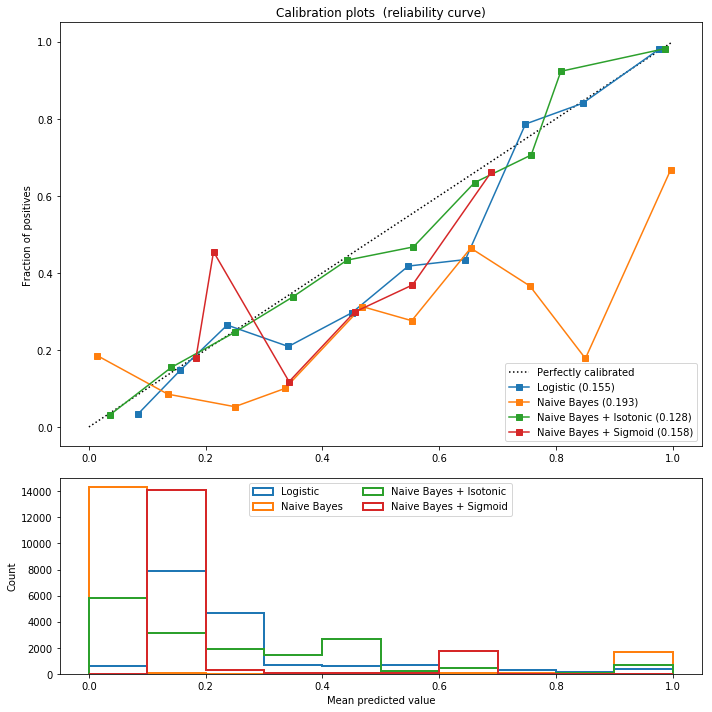

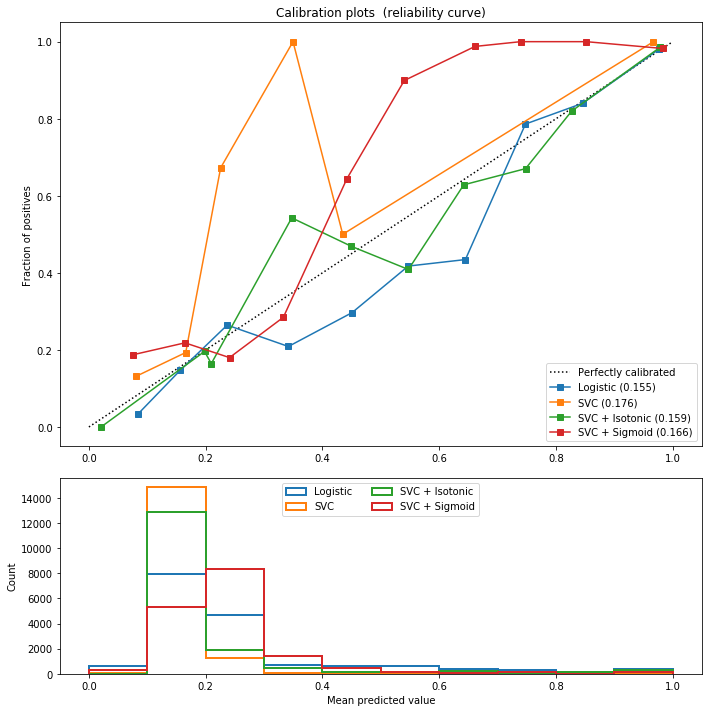

In [57]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score)
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split


# Create dataset of classification task with many redundant and few
# informative features
X, y = datasets.make_classification(n_samples=100000, n_features=20,
                                    n_informative=2, n_redundant=10,
                                    random_state=42)


def plot_calibration_curve(est, name, fig_index):
    """Plot calibration curve for est w/o and with calibration. """
    # Calibrated with isotonic calibration
    isotonic = CalibratedClassifierCV(est, cv=2, method='isotonic')

    # Calibrated with sigmoid calibration
    sigmoid = CalibratedClassifierCV(est, cv=2, method='sigmoid')

    # Logistic regression with no calibration as baseline
    lr = LogisticRegression(C=1., solver='lbfgs')

    fig = plt.figure(fig_index, figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))

    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    for clf, name in [(lr, 'Logistic'),
                      (est, name),
                      (isotonic, name + ' + Isotonic'),
                      (sigmoid, name + ' + Sigmoid')]:
        clf.fit(X_train, Y_train)
        y_pred = clf.predict(X_test)
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(X_test)[:, 1]
        else:  # use decision function
            prob_pos = clf.decision_function(X_test)
            prob_pos = \
                (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())

        clf_score = brier_score_loss(Y_test, prob_pos, pos_label=y.max())
        print("%s:" % name)
        print("\tBrier: %1.3f" % (clf_score))
        print("\tPrecision: %1.3f" % precision_score(Y_test, y_pred))
        print("\tRecall: %1.3f" % recall_score(Y_test, y_pred))
        print("\tF1: %1.3f\n" % f1_score(Y_test, y_pred))

        fraction_of_positives, mean_predicted_value = \
            calibration_curve(Y_test, prob_pos, n_bins=10)

        ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                 label="%s (%1.3f)" % (name, clf_score))

        ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
                 histtype="step", lw=2)

    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title('Calibration plots  (reliability curve)')

    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")
    ax2.legend(loc="upper center", ncol=2)

    plt.tight_layout()

# Plot calibration curve for Gaussian Naive Bayes
plot_calibration_curve(GaussianNB(), "Naive Bayes", 1)

# Plot calibration curve for Linear SVC
plot_calibration_curve(LinearSVC(), "SVC", 2)

plt.show()

# Credits

https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html#sphx-glr-auto-examples-calibration-plot-calibration-curve-py